In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset from CSV file
data = pd.read_csv('table_1_1_clean.csv')

# Extract the relevant columns from the dataset
years = data['Year']
fp_marine = data['FP Marine']
fp_inland = data['FP Inland']
aagr_marine = data['AAGR Marine']
aagr_inland = data['AAGR Inland']

# Calculate total fish production (FP Total) and all-India average growth rate (AAGR All India)
fp_total = fp_marine + fp_inland
aagr_all_india = (aagr_marine + aagr_inland) / 2

# Combine years and FP Total arrays for linear regression
years = years.str.split('-', expand=True)[0].astype(int)
years = years.values.reshape(-1, 1)
fp_total = fp_total.values.reshape(-1, 1)



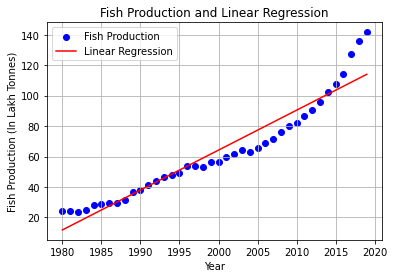

Estimated MSY: 116.6477307692312


In [6]:
# Perform linear regression to estimate intercept and slope
regressor = LinearRegression()
regressor.fit(years, fp_total)

intercept = regressor.intercept_[0]
slope = regressor.coef_[0][0]

# Calculate MSY
current_year = 2020
msy = intercept + slope * current_year

# Plotting the data and linear regression line
plt.scatter(years, fp_total, color='b', label='Fish Production')
plt.plot(years, regressor.predict(years), color='r', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Fish Production (In Lakh Tonnes)')
plt.title('Fish Production and Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Print the estimated MSY
print("Estimated MSY:", msy)